In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('flights.csv')
df.info()

/tmp/ipykernel_32462/493874064.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [3]:
# Number of flights which were diverted
df.value_counts('DIVERTED')  

DIVERTED
0    5803892
1      15187
Name: count, dtype: int64

/tmp/ipykernel_32462/1931411040.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


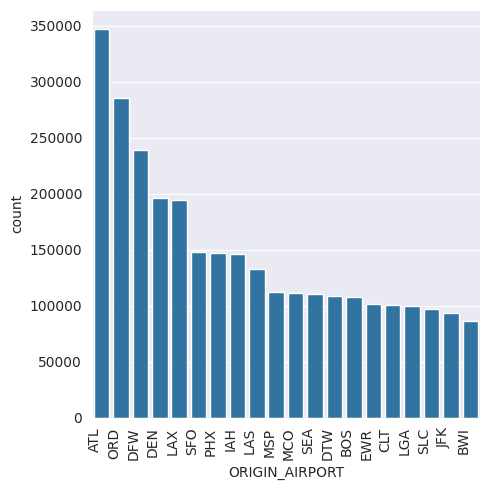

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
axis = sns.countplot(x=df['ORIGIN_AIRPORT'], data = df,
              order=df['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

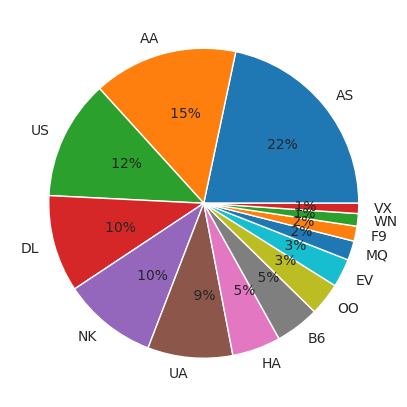

In [5]:
axis = plt.subplots(figsize=(5,7))
Name = df["AIRLINE"].unique()
size = df["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

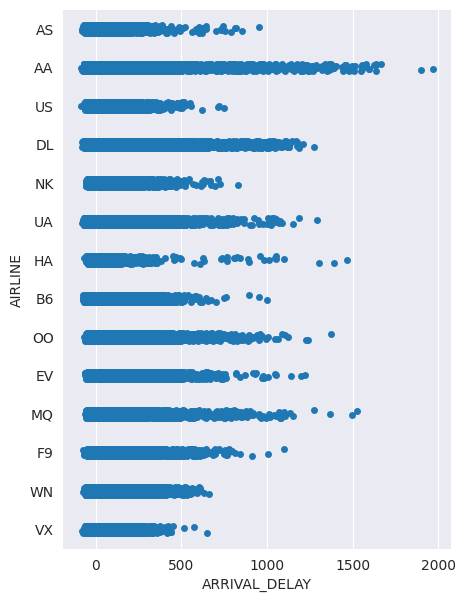

In [6]:
axis = plt.subplots(figsize=(5,7))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = df, dodge=True, jitter=True
            )
plt.show()

In [7]:
def prep_data(df):
    delay = []
    for row in df['ARRIVAL_DELAY']:
        if row > 60:
            delay.append(3)
        elif row > 30:
            delay.append(2)
        elif row > 15:
            delay.append(1)
        else:
            delay.append(0)
    df['delay'] = delay
    # df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED", "DIVERTED"], axis=1)
    df = df.drop(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON', "DIVERTED"], axis=1)
    df = df.dropna(axis=0, how='any', inplace=True)
    
    return df
    

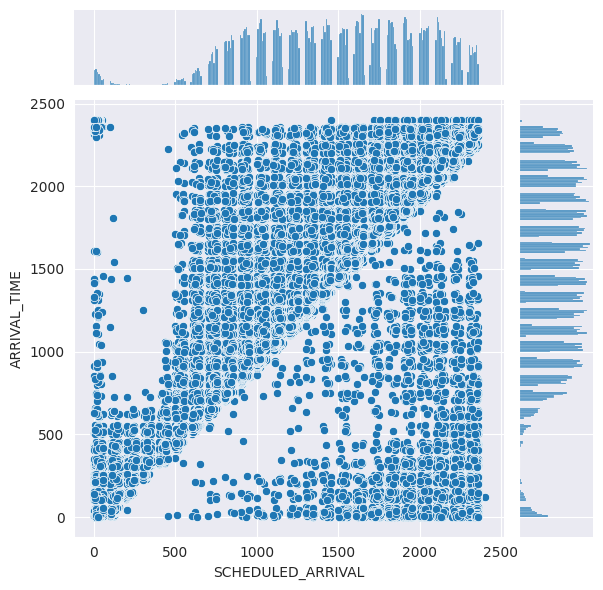

In [8]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [9]:
df = prep_data(df)
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
27,2015,1,1,4,115,127.0,12.0,14.0,141.0,207.0,...,542,607.0,25.0,0,25.0,0.0,0.0,0.0,0.0,1
30,2015,1,1,4,125,237.0,72.0,9.0,246.0,204.0,...,549,632.0,43.0,0,43.0,0.0,0.0,0.0,0.0,2
35,2015,1,1,4,145,145.0,0.0,16.0,201.0,370.0,...,555,610.0,15.0,0,0.0,0.0,15.0,0.0,0.0,0
50,2015,1,1,4,307,304.0,-3.0,25.0,329.0,173.0,...,500,520.0,20.0,0,20.0,0.0,0.0,0.0,0.0,1
52,2015,1,1,4,400,535.0,95.0,9.0,544.0,185.0,...,605,730.0,85.0,0,0.0,0.0,85.0,0.0,0.0,3
55,2015,1,1,4,438,550.0,72.0,15.0,605.0,241.0,...,739,908.0,89.0,0,17.0,0.0,72.0,0.0,0.0,3
70,2015,1,1,4,515,703.0,108.0,15.0,718.0,161.0,...,856,1038.0,102.0,0,0.0,0.0,0.0,0.0,102.0,3
73,2015,1,1,4,520,620.0,60.0,13.0,633.0,150.0,...,850,950.0,60.0,0,0.0,0.0,60.0,0.0,0.0,2
74,2015,1,1,4,520,618.0,58.0,19.0,637.0,141.0,...,841,935.0,54.0,0,0.0,0.0,54.0,0.0,0.0,2
86,2015,1,1,4,530,623.0,53.0,32.0,655.0,125.0,...,835,941.0,66.0,0,13.0,0.0,53.0,0.0,0.0,3


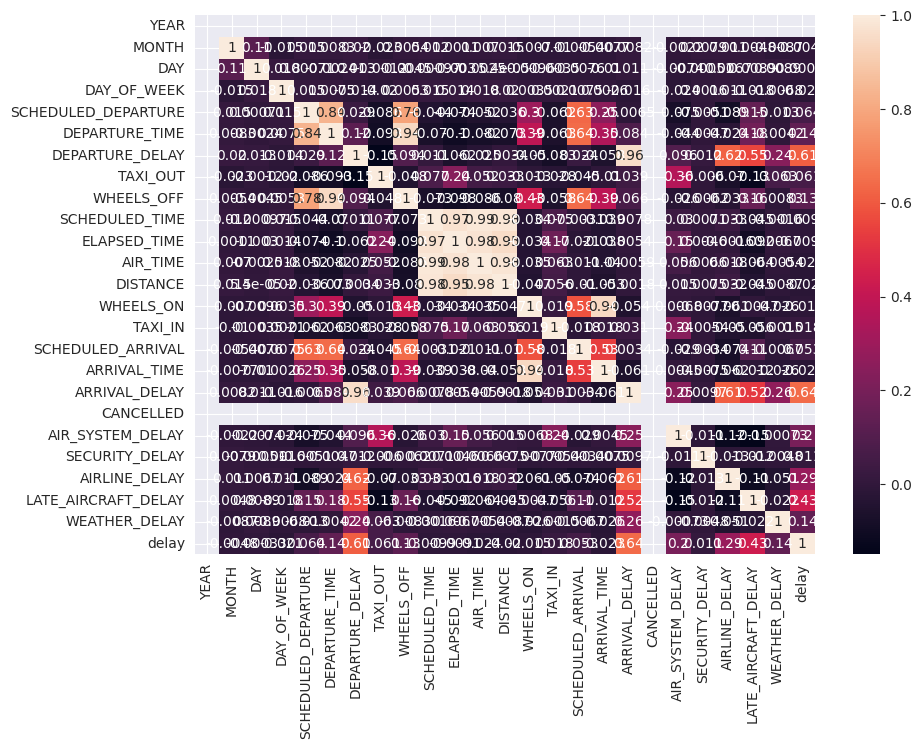

In [10]:
axis = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [11]:
corr_matrix = df.corr()
print(corr_matrix['delay'].sort_values(ascending=False))


delay                  1.000000
ARRIVAL_DELAY          0.640884
DEPARTURE_DELAY        0.611960
LATE_AIRCRAFT_DELAY    0.431899
AIRLINE_DELAY          0.289193
AIR_SYSTEM_DELAY       0.204263
DEPARTURE_TIME         0.140376
WEATHER_DELAY          0.139379
WHEELS_OFF             0.125912
SCHEDULED_DEPARTURE    0.064313
TAXI_OUT               0.061460
SCHEDULED_ARRIVAL      0.052790
TAXI_IN                0.017867
SECURITY_DELAY         0.011260
DAY                   -0.000334
MONTH                 -0.004751
ELAPSED_TIME          -0.009108
SCHEDULED_TIME        -0.009921
WHEELS_ON             -0.014593
DISTANCE              -0.020229
DAY_OF_WEEK           -0.020897
ARRIVAL_TIME          -0.022676
AIR_TIME              -0.023913
YEAR                        NaN
CANCELLED                   NaN
Name: delay, dtype: float64


In [12]:

df = df.drop([
    'ARRIVAL_DELAY', 'DEPARTURE_DELAY', 
    # 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 
    # 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'TAXI_OUT', 'TAXI_IN', 
    # 'WHEELS_OFF', 'WHEELS_ON', 'AIR_TIME', 'ELAPSED_TIME', 'ARRIVAL_TIME', 
    # 'DEPARTURE_TIME', 'CANCELLED', 'CANCELLATION_REASON'
], axis=1)


In [13]:
corr_matrix = df.corr()
print(corr_matrix['delay'].sort_values(ascending=False))


delay                  1.000000
LATE_AIRCRAFT_DELAY    0.431899
AIRLINE_DELAY          0.289193
AIR_SYSTEM_DELAY       0.204263
DEPARTURE_TIME         0.140376
WEATHER_DELAY          0.139379
WHEELS_OFF             0.125912
SCHEDULED_DEPARTURE    0.064313
TAXI_OUT               0.061460
SCHEDULED_ARRIVAL      0.052790
TAXI_IN                0.017867
SECURITY_DELAY         0.011260
DAY                   -0.000334
MONTH                 -0.004751
ELAPSED_TIME          -0.009108
SCHEDULED_TIME        -0.009921
WHEELS_ON             -0.014593
DISTANCE              -0.020229
DAY_OF_WEEK           -0.020897
ARRIVAL_TIME          -0.022676
AIR_TIME              -0.023913
YEAR                        NaN
CANCELLED                   NaN
Name: delay, dtype: float64
